Imports. We need matplotlib/numpy to show images inline in iPython.

In [2]:
import os
from PIL import Image, ImageFilter
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline

Constants and configuration

In [3]:
# Source and destination directories.
source_dir = 'images.only-faces/'
dest_dir   = 'images.only-faces.normalized/'

# We're normalizing the images to be square.
normalized_size = 64

Walking filesystem trees

In [4]:
root_dir = source_dir
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        print os.path.join(subdir, file)

images.only-faces/.DS_Store
images.only-faces/sam_eagle/download (6).jpeg
images.only-faces/sam_eagle/download (12).jpeg
images.only-faces/sam_eagle/download (1).jpeg
images.only-faces/sam_eagle/images (9).jpeg
images.only-faces/sam_eagle/images (4).jpeg
images.only-faces/sam_eagle/images (2).jpeg
images.only-faces/sam_eagle/images (12).jpeg
images.only-faces/sam_eagle/images (11).jpeg
images.only-faces/sam_eagle/download (10).jpeg
images.only-faces/sam_eagle/download (11).jpeg
images.only-faces/sam_eagle/download (5).jpeg
images.only-faces/sam_eagle/download (8).jpeg
images.only-faces/sam_eagle/download (14).jpeg
images.only-faces/sam_eagle/images.jpeg
images.only-faces/sam_eagle/500full.jpg
images.only-faces/sam_eagle/download (13).jpeg
images.only-faces/sam_eagle/a52ebaa603e80a2f0677c001d5b0157d1b6af53616d0d74e703329f2ad197ff6.jpg
images.only-faces/sam_eagle/download (9).jpeg
images.only-faces/sam_eagle/images (1).jpeg
images.only-faces/sam_eagle/download (15).jpeg
images.only-faces

Function to normalize an image

In [5]:
def normalize_image(source_file, dest_file, size):
    # Read image
    input_image = Image.open(source_file)

    # Resize the image so that its longest edge is no longer than 'size' pixels.
    input_image.thumbnail([size, size])
    
    # Create a new square image to put the thumbnail in.
    normalized_image = Image.new("RGB", [size, size])
    
    x = (size - input_image.width)  / 2
    y = (size - input_image.height) / 2
    normalized_image.paste(input_image, box=(x, y))
    
    # Save the normalized image
    normalized_image.save(dest_file, 'PNG')

Now walk the tree and perform the normalization.

In [7]:
for subdir, dirs, files in os.walk(source_dir):
    for file in files:
        # Generate the name for the normalized file: 
        # - In the destination directory.
        # - Change extension to .png.
        input_file = os.path.join(subdir, file)
        dest_file  = input_file.replace(source_dir, dest_dir, 1)
        dest_file  = os.path.splitext(dest_file)[0] + ".png"
        
        # Create the directory it's supposed to be in.
        if not os.path.exists(os.path.dirname(dest_file)):
            os.makedirs(os.path.dirname(dest_file))
        
        # Now perform the normalization
        normalize_image(input_file, dest_file, normalized_size)

Let's see what one of these looks like...

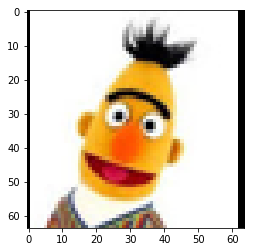

In [9]:
image = Image.open("images.only-faces.normalized/bert/download (7).png")
imshow(np.asarray(image))